# 集団のモデル

In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

- 自己複製する個体からなる集団は、適者生存の原理によって**進化**する。
- 今回は、**集団**の個体数が増加していく過程と、進化的な変化の過程を、簡単なモデルから考える。

### 今回の Question

1. ある性質（表現型）を持つ生物が、他の性質を持つ生物よりも有利に選択され、支配的になる状況とはどんなものか？
2. 自然選択によって、あるひとつの性質を持つ生物が独り勝ちするのではなく、２つの異なる性質の生物が安定的に共存することがありえるのか？
3. 遺伝の過程に求められる精度とはどの程度のものなのか？

## 個体数増加のモデル

ひとつの細胞がふたつに分裂する細胞分裂をしながら増殖していく微生物のような生物集団を考えよう。

時刻 $t$ において、集団を構成する微生物の個体数が $x$ だったとする。

この集団中の微生物１個体を、短い時間 $\delta t$ のあいだ観察した結果、その間に微生物が分裂する確率が $r \delta t$ だとわかった。$r$ が一定だとすると、集団全体での個体数 $x$ の増加量 $\delta x$ は次のように書ける。

$$\delta x = r \delta t x \tag{1}$$

数学の文脈で $\delta$ はしばしば、小さな差分、小さな変化を表す。時刻 $t$ に対し、$\delta t$ は小さな時間の変化すなわち短い時間を表し、個体数 $x$ に対して、$\delta x$ は、個体数の小さな変化を表す。

$\delta t$ が $0$ に近づくと（$\delta t \rightarrow 0$）、この式は次の**微分方程式**になる。

$$\frac{ dx }{ dt } = r x \tag{2}$$

ここで、$\frac{ d }{ dt }$ は**時間微分**を表す。時間微分とは、速度（時間あたりの変化量）のことである。$\frac{ dx }{ dt }$ は、$x$ の時間微分を表し、これはすなわち $x$ の変化速度（単位時間あたりの $x$ の変化量）を意味する。

この微分方程式は解析的に次のように解くことができる。（ここでは、解法はわからなくてもいい）

$$x(t) = x_0 e^{rt} \tag{3}$$

ただし、$x_0$ は、時刻 $t = 0$ における個体数である。$x(t)$ は時刻 $t$ における個体数 $x$ を意味する。

$r$ は、この微生物の増殖速度を決める数値であり、**内的自然増加率** と呼ばれる。


### 【演習１】この式をグラフに描いて、$x_0$ や $r$ の値を変えて、その影響を試してみよう


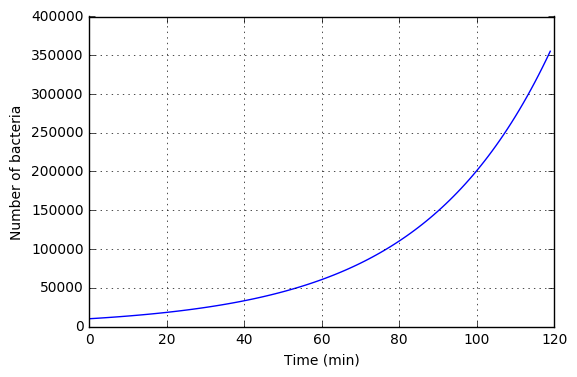

In [2]:
# 時刻の値のリストをつくる。時刻0から300までを、間隔1で300の点を用意する。
t_values = np.arange(0, 120, 1)

x0 = 10000  # 時刻0における個体数
r  = 0.03   # 内的自然増加率

# 時刻リストに対応した個体数を計算する
x_values = x0 * np.exp( r * t_values )
 
# グラフ描画：横軸に t_values, 縦軸に x_values を用いてプロットする
plt.plot( t_values, x_values, "-" )
plt.grid()                       # グリッドを表示
plt.xlabel('Time (min)')         # X軸のラベル
plt.ylabel('Number of bacteria') # Y軸のラベル
plt.show()

両辺の対数を取ると次の式を得る。

$$\ln x = \ln x_0 + rt \tag{4}$$

これをプロットすると下のセルのようになる。

直線の傾きは内的自然増加率 $r$ である。

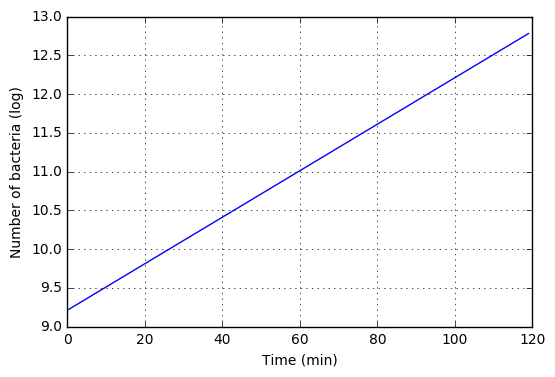

In [3]:
ln_x_values = np.log( x0 ) + r * t_values

# グラフ描画
plt.plot( t_values, ln_x_values, "-" )
plt.grid()
plt.xlabel('Time (min)')
plt.ylabel('Number of bacteria (log)')
plt.show()

これまで、$r$ は一定とみなしてきたが、実際にはどうだろうか。一定ではないと考えられる理由をいくつか挙げてみる。

1. **同期** 集団中の微生物が分裂を起こすタイミングが揃っているようだと、分裂が起こる短時間の間に集団の個体数は急激に倍増し、しばらく個体数の増減がない状態がつづいた後、また短時間に倍増するような階段状の推移がみられるだろう。分裂を繰り返すことによって、徐々に同期は失われていく。

2. **遺伝的な不均一性** 集団を構成する微生物の遺伝子型に個体差がある場合、時間経過とともに、より多くの子孫を残す個体とそうでない個体がいるために集団の平均的な内的自然増加率は変化することになるだろう。

3. **有限な環境資源** 集団が生育する環境には無限の資源があるわけではなく、微生物が増加することによってやがて資源が枯渇し、増殖が停止するだろう。

３番目のアイディアは、マルサスが「人口論」で説いたものであり、ダーウィンが自然選択による進化という着想を得るヒントになったとされる。

有限の資源を考慮して、式２を拡張したのが、次の**ロジスティック方程式**である。新たに導入されたパラメータ $K$ は**環境収容力**と呼ばれる。

$$\frac{ dx }{ dt } = rx ( 1 - \frac{x}{K} ) \tag{5}$$

この方程式は理論生物学の基盤中の基盤となっている。

ロジスティック方程式も次のように解析的に解ける。

$$x(t) = \frac{K}{1 + \frac{K-x_0}{x_0}e^{-rt}} \tag{6}$$


### 【演習２】ロジスティック方程式をグラフに描き、$K$ の影響を調べてみよう。

- 下のセルでは、式２（式３）の単純なモデルと、式５（式６）のロジスティック方程式を重ねてグラフに描いている。

- $K$ の値を変えて試してみよう。
- 他のパラメータも変えて、いろいろ試してみよう。

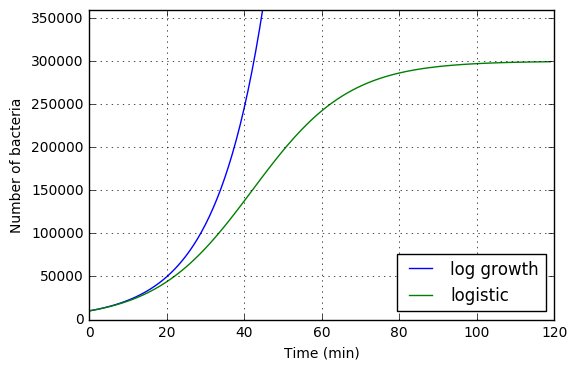

In [4]:
x0 = 10000  # 時刻0における個体数
r  = 0.08    # 内的自然増加率
K  = 300000 # 環境収容力

# 式３
x_values = x0 * np.exp( r * t_values )

# 式６　ロジスティック方程式
logistic_x_values = K / ( 1.0 + ( K - x0 ) / x0 * np.exp( -r * t_values ))
 
# グラフ描画：横軸に t_values, 縦軸に x_values を用いてプロットする
plt.plot( t_values, x_values, "-", label='log growth' )  # labelは凡例で用いるラベル
plt.plot( t_values, logistic_x_values, "-", label='logistic' )
plt.ylim([0,K*1.2])  # Y軸の範囲を 0 ≦ y ≦ 1.2 K に制限
plt.grid()
plt.xlabel('Time (min)')
plt.ylabel('Number of bacteria')
plt.legend(loc='best')  # 凡例を表示。locは表示場所の指定。'best'は自動でよさそうな場所に表示。
plt.show()

ロジスティック方程式は、以下の性質を持っていることがわかる。

1. $x$ が小さい時、式５は式２に近づく。これは、集団のサイズ（個体数）が小さい時、その増加がしばしば指数関数的になるという事実と合致する。

2. 時間とともに個体数の増加は徐々に鈍化し、やがて**環境収容力** $K$ 付近で平衡に達する。個体数 $x$ が $K$ より小さければ増加し、大きければ減少し、$K$ へと接近していく。

## 異なる性質を持つ微生物に働く自然選択

ここで、冒頭に挙げた Question 1 について考えて見よう。

- ある性質（表現型）を持つ生物が、他の性質を持つ生物よりも有利に選択され、支配的になる状況とはどんなものか？

式５を使って、異なる性質をもつ２種類の微生物 $\alpha$,  $\beta$ をモデル化してみる。両者の違いは、$r$, $K$ の値の違いとして表現することにする。

$$\frac{ dx_{\alpha} }{ dt } = r_{\alpha} x_{\alpha} ( 1 - \frac{x_{\alpha}}{K_{\alpha}} ), \\
\frac{ dx_{\beta} }{ dt } = r_{\beta} x_{\beta} ( 1 - \frac{x_{\beta}}{K_{\beta}} ) \tag{7}$$

ただし、$x_{\alpha}$, $r_{\alpha}$, $K_{\alpha}$ は、それぞれ微生物 $\alpha$ の個体数、内的自然増加率、環境収容力を表し、$x_{\beta}$, $r_{\beta}$, $K_{\beta}$ は、それぞれ微生物 $\beta$ の個体数、内的自然増加率、環境収容力を表す。

この式７のモデルを**自然選択モデルA**と呼ぶことにする。

### 【演習３】自然選択モデルAをパラメーターを変えながら試してみよう。

- 真下のセルでは、`scipy` という科学技術計算モジュールに備わっている微分方程式を計算してくれる関数 `odeint()` を用いて式７を計算（数値積分）するための関数を作っている。
- 今のところこのセルの内容を理解する必要はないが、最後の `return`文で定義している戻り値は、２つのロジスティック方程式から求められる $\frac{ dx }{ dt }$ をそのまま計算しているだけである。
- **真下のセルの内容を書き換える必要はない。**

In [5]:
# 自然選択モデルAを解くための関数
def model_A( x, t, r, K ):  # 最初の２つの引数の順序は変えられない
    # x = [ x_α, x_β ]
    # t : 計算する時刻の点のリスト（NumPyアレイ）
    # r = [ r_α, r_β ]
    # K = [ K_α, K_β ]
    dx_alpha_dt = r[0] * x[0] * ( 1.0 - ( x[0] / K[0] ))
    dx_beta_dt = r[1] * x[1] * ( 1.0 - ( x[1] / K[1] ))
    
    return [ dx_alpha_dt, dx_beta_dt ]

- この下のセルで、具体的なパラメータを設定して、シミュレーションを行う。
- $x_{\alpha}$, $r_{\alpha}$, $K_{\alpha}$, $x_{\beta}$, $r_{\beta}$, $K_{\beta}$ を書き換えて、結果がどう変わるか、いろいろ試してみよう。
- セルそのものをコピペして複製すれば、いくつもの条件のグラフを別々に描くこともできる。
- 微生物 $\alpha$,  $\beta$ の成長を同時に計算した場合と、どちらか一方だけにした場合との間にどんな差があるだろうか（お互いにどのように影響しあっているだろうか）。
  - どちらかの微生物の初期の個体数 $x_0$ を $0$ にすれば、どちらか一方だけが存在する状況をシミュレートできる。

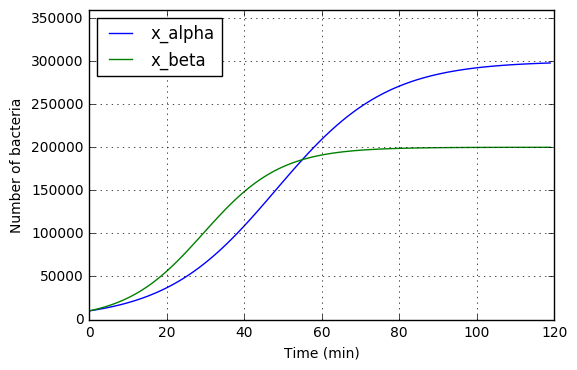

In [6]:
# 微生物αのパラメータ（別の数値も試してみよう）
x0_a = 10000
r_a  = 0.07
K_a  = 300000

# 微生物βのパラメータ（別の数値も試してみよう）
x0_b = 10000
r_b  = 0.1
K_b  = 200000

# パラメータをまとめたリスト（書き換える必要はない）
x0_ls = [ x0_a, x0_b ]
r_ls = [ r_a, r_b ]
K_ls = [ K_a, K_b ]

# 微分方程式の求解（書き換える必要はない）
model_A_result = odeint( model_A, x0_ls, t_values, args = ( r_ls, K_ls ))

# グラフ描画（より見やすいグラフにするために書き換えてもよい）
plt.plot( t_values, model_A_result[:, 0], "-", label='x_alpha' )  # 微生物αの個体数をプロット
plt.plot( t_values, model_A_result[:, 1], "-", label='x_beta' )  # 微生物βの個体数をプロット
plt.ylim([0, max( K_ls ) * 1.2])  # Y軸の範囲を 0 ≦ y ≦ 1.2 K に制限
plt.grid()
plt.xlabel('Time (min)')
plt.ylabel('Number of bacteria')
plt.legend(loc='best')
plt.show()

### 自然選択モデルAの検討結果

- 微生物 $\alpha$,  $\beta$ の個体数は、最終的に $K_{\alpha}$, $K_{\beta}$ に接近していく。
- 初期の増殖速度は $r_{\alpha}$, $r_{\beta}$ の影響を受けるが、最終的な平衡状態には影響しない。
- 微生物 $\alpha$,  $\beta$ の個体数は、互いにまったく影響しあっていない。
  - 式７で、相手の状況が影響するような部分が一切ないので、当然である。

### 相互に影響するようにモデルを書き換える

微生物 $\alpha$,  $\beta$ が影響しあうようにモデルを書き換えてみる。

環境収容力 $K$ は、その生物種が利用可能な資源の上限を表しているといえる。ロジスティック方程式の $( 1 - \frac{x}{K} )$ の部分は、個体数 $x$ が $K$ に近づくほど、$0$ に近づき、その結果、増殖速度 $\frac{ dx }{ dt }$ も低下し、$0# に近づく。

逆に、$x$ が $K$ よりも充分に小さいと（$x \ll K$）、$( 1 - \frac{x}{K} )$ は $1$ に近づき、式２と同じ、**対数増殖** する状況となる。

微生物が相互に影響するとは、例えば、環境中の同じ栄養素を利用しているために、$\beta$ の個体数 $x_{\beta}$ が増加することにより、$\alpha$ の増殖速度 $\frac{ dx_{\alpha} }{ dt }$ も低下するような状況だろう。

そこで、そうなるように自然選択モデルAを少し書き換えてみる。

#### 自然選択モデルB

$$\frac{ dx_{\alpha} }{ dt } = r_{\alpha} x_{\alpha} ( 1 - \frac{x_{\alpha}+x_{\beta}}{K_{\alpha}} ), \\
\frac{ dx_{\beta} }{ dt } = r_{\beta} x_{\beta} ( 1 - \frac{x_{\alpha}+x_{\beta}}{K_{\beta}} ) \tag{8}$$


### 【演習４】自然選択モデルBをパラメーターを変えながら試してみよう。

- 演習３と同様に、自然選択モデルBの性質を調べてみよう。
- $K_{\alpha} = K_{\beta}$ の場合にどんな結果になるか調べてみよう。

In [7]:
# 自然選択モデルBを解くための関数
def model_B( x, t, r, K ):
    # x = [ x_α, x_β ]
    # t : 計算する時刻の点のリスト（NumPyアレイ）
    # r = [ r_α, r_β ]
    # K = [ K_α, K_β ]
    dx_alpha_dt = r[0] * x[0] * ( 1.0 - (( x[0] + x[1] ) / K[0] ))
    dx_beta_dt = r[1] * x[1] * ( 1.0 - (( x[0] + x[1] ) / K[1] ))
    
    return [ dx_alpha_dt, dx_beta_dt ]

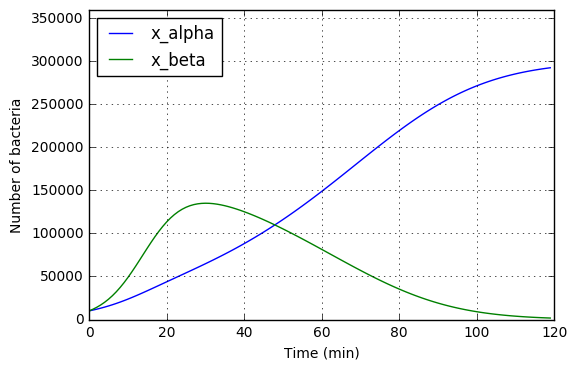

In [8]:
# 微生物αのパラメータ（別の数値も試してみよう）
x0_a = 10000
r_a  = 0.1
K_a  = 300000

# 微生物βのパラメータ（別の数値も試してみよう）
x0_b = 10000
r_b  = 0.2
K_b  = 200000

# パラメータをまとめたリスト（書き換える必要はない）
x0_ls = [ x0_a, x0_b ]
r_ls = [ r_a, r_b ]
K_ls = [ K_a, K_b ]

# 微分方程式の求解（書き換える必要はない）
model_B_result = odeint( model_B, x0_ls, t_values, args = ( r_ls, K_ls ))

# グラフ描画（より見やすいグラフにするために書き換えてもよい）
plt.plot( t_values, model_B_result[:, 0], "-", label='x_alpha' )  # 微生物αの個体数をプロット
plt.plot( t_values, model_B_result[:, 1], "-", label='x_beta' )  # 微生物βの個体数をプロット
plt.ylim([0, max( K_ls ) * 1.2])  # Y軸の範囲を 0 ≦ y ≦ 1.2 K に制限
plt.grid()
plt.xlabel('Time (min)')
plt.ylabel('Number of bacteria')
plt.legend(loc='best')
plt.show()

### 自然選択モデルBの検討結果

- 微生物 $\alpha$,  $\beta$ の個体数の平衡状態は、$K_{\alpha}$, $K_{\beta}$ の大小関係によって決まる。
  - $K_{\alpha} > K_{\beta}$ のとき、微生物 $\alpha$ の個体数は、$K_{\alpha}$ で平衡となり、微生物 $\beta$ は死滅する（個体数 $0$）。
  - $K_{\alpha} < K_{\beta}$ のとき、微生物 $\beta$ の個体数は、$K_{\beta}$ で平衡となり、微生物 $\alpha$ は死滅する（個体数 $0$）。

  - $K_{\alpha} = K_{\beta}$ のとき、両者の個体数の和 $x_{\alpha}+x_{\beta}$ が $K_{\alpha} (= K_{\beta})$ に等しくなった状態で平衡状態に達する。
    - 微生物 $\alpha$,  $\beta$ の個体数は、それぞれの最初の個体数 $x_0$ と内的自然増加率 $r$ の大小関係によって決まる。



### 自然選択モデルBのふるまいのメカニズム

- 微生物の増殖速度は、いずれも $x_{\alpha}+x_{\beta}$ の大小によって増減する。

- $K_{\alpha} > K_{\beta}$ の場合について考えてみる。２種類の微生物の個体数が少ない状態から増加してきた時、微生物の総個体数 $x_{\alpha}+x_{\beta}$ は、$K_{\alpha}$ より早く、$K_{\beta}$ に達する。

- $x_{\alpha}+x_{\beta} = K_{\beta}$ の時、$( 1 - \frac{x_{\alpha}+x_{\beta}}{K_{\beta}} ) = 0$ となり、$\frac{ dx_{\beta} }{ dt } = 0$ となる。
  - この時、$\frac{ dx_{\alpha} }{ dt } > 0$ なので、総個体数はなお増加する。

- $K_{\beta} < x_{\alpha}+x_{\beta} < K_{\alpha}$ の時、$( 1 - \frac{x_{\alpha}+x_{\beta}}{K_{\beta}} ) < 0$ となるので、微生物 $\beta$ は減少する。
  - 一方、$( 1 - \frac{x_{\alpha}+x_{\beta}}{K_{\alpha}} ) > 0$ なので、微生物 $\alpha$ は増加しつづける。

- そして、$x_{\alpha}+x_{\beta} = K_{\alpha}$ になったところで、微生物 $\alpha$ の増殖は停止する。ただし、この時も、$( 1 - \frac{x_{\alpha}+x_{\beta}}{K_{\beta}} ) < 0$ なので、微生物 $\beta$ は死滅するまで減少しつづけ、微生物 $\beta$ が減った分、微生物 $\alpha$ が増えられる。

- 最終的には、微生物 $\beta$ が死滅し、微生物 $\alpha$ の個体数 $x_{\alpha} = K_{\alpha}$ になった状態で平衡状態に達する。

- ２種類の微生物が共存できるのは、$K_{\alpha} = K_{\beta}$ の場合だけである。
  - 現実に、異なる生物が共存する条件はこんなにも窮屈なのだろうか。
  - もう少しモデルを改変する余地はないか。

### さまざまな共存が起こるモデルをつくる

今回の Question の２番目に、以下の問いを挙げた。

- 自然選択によって、あるひとつの性質を持つ生物が独り勝ちするのではなく、２つの異なる性質の生物が安定的に共存することがありえるのか？

ここからは、どちらかが死滅するのではなく、双方がある個体数を維持したまま共存・安定し、**平衡状態**を実現するようなモデルを考えてみよう。

### 影響が非対称になるようにモデルを書き換える

自然選択モデルBにおける、$\frac{x_{\alpha}+x_{\beta}}{K_{\alpha}}$ および $\frac{x_{\alpha}+x_{\beta}}{K_{\beta}}$ は、微生物 $\alpha$,  $\beta$ の個体数が、同じインパクトで両者の増殖速度に影響していることを表している。

これは、両者が成長のために利用する環境資源を、同等に消費しながら成長していると仮定していると解釈できる。

現実には、微生物 $\alpha$ の個体数が微生物 $\beta$ の環境資源および増殖速度に与える影響は、微生物 $\beta$ 自身の個体数とは同じではないだろう。逆も同様である。

自然界では、同じ空間に生育する微生物であっても、環境中から利用する資源の種類とそのそれぞれの重要性は異なる。したがって、それぞれの個体数が相互に与える影響も異なる（非対称である）にが一般的だろう。

そこで、そうなるように自然選択モデルBを書き換えてみる。

#### 自然選択モデルC

$$\frac{ dx_{\alpha} }{ dt } = r_{\alpha} x_{\alpha} ( 1 - \frac{x_{\alpha}+\sigma_{\beta} x_{\beta}}{K_{\alpha}} ), \\
\frac{ dx_{\beta} }{ dt } = r_{\beta} x_{\beta} ( 1 - \frac{x_{\beta}+\sigma_{\alpha}  x_{\alpha}}{K_{\beta}} ) \tag{8}$$

ただし、$\sigma_{\alpha}$, $\sigma_{\beta}$ は、ある微生物の個体数が他方の微生物の増殖速度に与える影響を表す。$\sigma = 1$ のとき、自然選択モデルBと等しくなる。$\sigma < 1$ では他者への影響は小さくなり、$\sigma > 1$ では他者への影響は他者自身より大きくなる。

### 【演習５】自然選択モデルCをパラメーターを変えながら試してみよう。

- 自然選択モデルCの性質を調べてみよう。

In [9]:
# 自然選択モデルCを解くための関数
def model_C( x, t, r, K, sigma ):
    # x = [ x_α, x_β ]
    # t : 計算する時刻の点のリスト（NumPyアレイ）
    # r = [ r_α, r_β ]
    # K = [ K_α, K_β ]
    # sigma = [ σ_α, σ_β ]
    dx_alpha_dt = r[0] * x[0] * ( 1.0 - (( x[0] + sigma[1] * x[1] ) / K[0] ))
    dx_beta_dt = r[1] * x[1] * ( 1.0 - (( x[1] + sigma[0] * x[0] ) / K[1] ))
    
    return [ dx_alpha_dt, dx_beta_dt ]

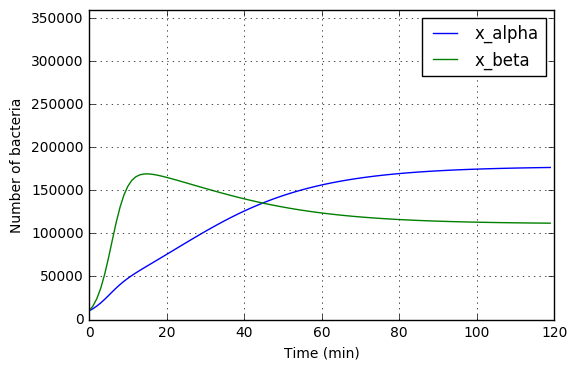

In [10]:
# 微生物αのパラメータ（別の数値も試してみよう）
x0_a = 10000
r_a  = 0.25
K_a  = 300000
s_a  = 0.5

# 微生物βのパラメータ（別の数値も試してみよう）
x0_b = 10000
r_b  = 0.5
K_b  = 200000
s_b  = 1.1

# パラメータをまとめたリスト（書き換える必要はない）
x0_ls = [ x0_a, x0_b ]
r_ls = [ r_a, r_b ]
K_ls = [ K_a, K_b ]
s_ls = [ s_a, s_b ]

# 微分方程式の求解（書き換える必要はない）
model_C_result = odeint( model_C, x0_ls, t_values, args = ( r_ls, K_ls, s_ls ))

# グラフ描画（より見やすいグラフにするために書き換えてもよい）
plt.plot( t_values, model_C_result[:, 0], "-", label='x_alpha' )  # 微生物αの個体数をプロット
plt.plot( t_values, model_C_result[:, 1], "-", label='x_beta' )  # 微生物βの個体数をプロット
plt.ylim([0, max( K_ls ) * 1.2])  # Y軸の範囲を 0 ≦ y ≦ 1.2 K に制限
plt.grid()
plt.xlabel('Time (min)')
plt.ylabel('Number of bacteria')
plt.legend(loc='best')
plt.show()

### 自然選択モデルCの考察

- 自然選択モデルA〜Cの平衡状態は、微生物 $\alpha$,  $\beta$ の増減がなくなった状態、すなわち、以下が充たされる状態である。

$$\frac{ dx_{\alpha} }{ dt } = 0, \\
\frac{ dx_{\beta} }{ dt } = 0 \tag{9}$$

- 自然選択モデルCの平衡状態では、下式が充たされることになる。

$$r_{\alpha} x_{\alpha} ( 1 - \frac{x_{\alpha}+\sigma_{\beta} x_{\beta}}{K_{\alpha}} ) = 0, \\
r_{\beta} x_{\beta} ( 1 - \frac{x_{\beta}+\sigma_{\alpha}  x_{\alpha}}{K_{\beta}} ) = 0 \tag{10}$$

- 連立方程式８を、$x_{\alpha}$, $x_{\beta}$ について解けば、自然選択モデルCの平衡状態を得ることができる。
  - 自然選択モデルA, B についても同じことがいえる。

### 自然選択モデルCの解のベクトル場を描いてみる

- 微生物 $\alpha$,  $\beta$ の個体数 $x_{\alpha}$, $x_{\beta}$ が決まれば、その瞬間の増殖速度 $\frac{ dx_{\alpha} }{ dt }$, $\frac{ dx_{\beta} }{ dt }$ が決まる。

- 横軸に $x_{\alpha}$, 横軸に $x_{\beta}$ を取った **$x_{\alpha}$-$x_{\beta}$平面**上の任意の点 $( x_{\alpha}$, $x_{\beta} )$ について、それに対応する増殖速度ベクトル $(\frac{ dx_{\alpha} }{ dt }, \frac{ dx_{\beta} }{ dt })$ を求められる。

- $x_{\alpha}$-$x_{\beta}$平面上に、増殖速度ベクトル $(\frac{ dx_{\alpha} }{ dt }, \frac{ dx_{\beta} }{ dt })$ を矢印として描画した**ベクトル場**プロットを作成することで、モデルの性質（の一部）を可視化してみる。

In [11]:
# 自然選択モデルCの各微生物の増殖速度を求める関数
def get_model_C_dxdt( x, r, K, s ):
    return [
        r[0] * x[0] * ( 1.0 - (( x[0] + s[1] * x[1] ) / K[0] )),
        r[1] * x[1] * ( 1.0 - (( x[1] + s[0] * x[0] ) / K[1] ))
    ]

# テスト
get_model_C_dxdt( x0_ls, r_ls, K_ls, s_ls )

[2325.0, 4625.0]

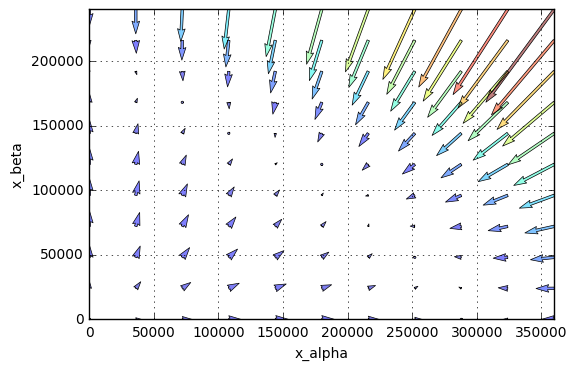

In [12]:
# ベクトル場を描く

n = 10  # メッシュの数（各軸に描く矢印の数）

# 縦軸、横軸のメッシュをつくり、矢印を描くポイントのリストを作成する
x_a, x_b = np.mgrid[ 0:K_a*1.21:K_a*1.2/n, 0:K_b*1.21:K_b*1.2/n ]

# メッシュ上の各点における増殖速度ベクトルを求める
dxdt_a, dxdt_b =  get_model_C_dxdt( [ x_a, x_b ], r_ls, K_ls, s_ls )

# ベクトルの長さ（α, βを合わせた速度の大きさ）を求める
v_len = np.sqrt( dxdt_a ** 2 + dxdt_b ** 2)

# ベクトル場の矢印を描画し、ベクトルの長さに応じて着色する
plt.quiver(x_a, x_b, dxdt_a, dxdt_b, v_len, alpha=.5 )
# ベクトル場の矢印を描画し、黒い細線で縁取る
plt.quiver(x_a, x_b, dxdt_a, dxdt_b, edgecolor='k', facecolor='None', linewidth=.5 )

plt.xlim([0, K_a * 1.2])
plt.ylim([0, K_b * 1.2])
plt.grid()
plt.xlabel('x_alpha')
plt.ylabel('x_beta')
plt.show()


#### 相空間プロット

- このグラフのように、横軸が時間ではなく、縦軸、横軸ともに、個体数のような変数になっているプロットを**相空間プロット**と呼ぶ。

- 自然選択モデルA〜Cでは、パラメータ $r$, $K$, $\sigma$ が定まることで、モデルが表現する２種の微生物の性質が定まる。
  - 性質が定まったモデルを**系（システム）**と呼ぶ。

- 個体数 $x_{\alpha}$, $x_{\beta}$ が決まると、増殖速度も決まるため、モデルの状態がすべて確定する。すなわち、$(x_{\alpha}, x_{\beta})$ はモデルの状態を表している。この状態を**相**と呼び、$x_{\alpha}$, $x_{\beta}$ によって張られる空間を**相空間**と呼ぶ。
  - この例では相空間が２次元なので、**相平面**とも呼ぶ。

- 相空間プロットは、系がとりうるあらゆる状態を相平面上に表現できる視覚化手法である。

### ベクトル場にヌルクラインを書き加えてみる

- $x_{\alpha}$-$x_{\beta}$平面上で、$\frac{ dx_{\alpha} }{ dt } = 0$ になる点を集めたものを $x_{\alpha}$ の**ヌルクライン**という。

- ヌルクライン上では、$\frac{ dx_{\alpha} }{ dt } = 0$ すなわち $x_{\alpha}$ の増殖速度は $0$ である。

- 上で描いたベクトル場に、$x_{\alpha}$ と $x_{\beta}$ のヌルクラインを書き加えてみよう。

- 自然選択モデルC（式8）を $\frac{ dx_{\alpha} }{ dt } = 0$ として解くと $x_{\alpha}$ のヌルクラインを求めることができる。
$$r_{\alpha} x_{\alpha} ( 1 - \frac{x_{\alpha}+\sigma_{\beta} x_{\beta}}{K_{\alpha}} ) = 0 \\
\therefore 1 - \frac{x_{\alpha}+\sigma_{\beta} x_{\beta}}{K_{\alpha}} = 0 $$

$$x_{\beta} = \frac{K_{\alpha}-x_{\alpha}}{\sigma_{\beta}} \tag{11}$$

- 同様に $\frac{ dx_{\beta} }{ dt } = 0$ として解き、$x_{\beta}$ のヌルクラインを求める。

$$x_{\beta} = K_{\beta} - \sigma_{\alpha}  x_{\alpha} \tag{12}$$

- ２つのヌルクラインを上のベクトル場のプロットに重ねてみる。

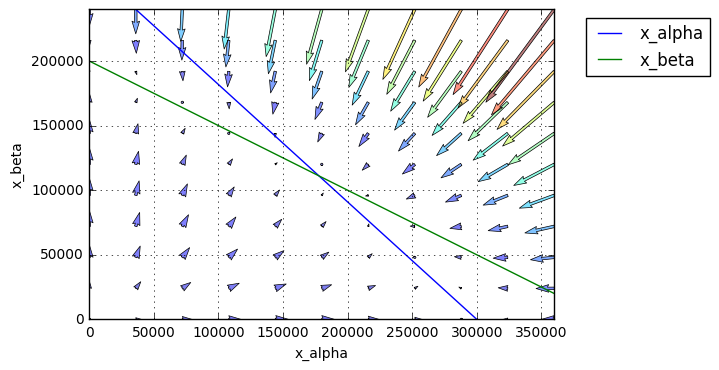

In [13]:
# ヌルクライン用の横軸（x_a）のポイントのリスト
x_a_values = np.arange( 0, K_a * 1.21, K_a * 1.2/n )

# x_αのヌルクライン
x_a_nullcline_values = ( K_a - x_a_values ) / s_b

# x_βのヌルクライン
x_b_nullcline_values = K_b - s_a * x_a_values

# ベクトル場をプロットする
plt.quiver(x_a, x_b, dxdt_a, dxdt_b, v_len, alpha=.5 )
plt.quiver(x_a, x_b, dxdt_a, dxdt_b, edgecolor='k', facecolor='None', linewidth=.5 )

# ヌルクラインをプロットする
plt.plot( x_a_values, x_a_nullcline_values, "-", label='x_alpha' )
plt.plot( x_a_values, x_b_nullcline_values, "-", label='x_beta' )

plt.xlim([0, K_a * 1.2])
plt.ylim([0, K_b * 1.2])
plt.grid()
plt.xlabel('x_alpha')
plt.ylabel('x_beta')
plt.legend(loc='upper left', bbox_to_anchor=( 1.05, 1.0 ))  # 凡例を枠外に表示
plt.show()

### 微生物 $\alpha$,  $\beta$ の個体数の推移を重ね合わせてみる

- さらに、微生物の個体数 $x_{\alpha}$, $x_{\beta}$ の推移を書き加えてみる。 

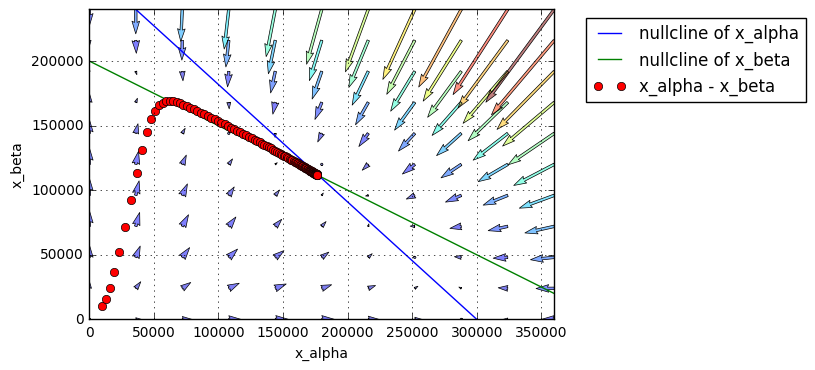

In [14]:
# ヌルクライン用の横軸（x_a）のポイントのリスト
x_a_values = np.arange( 0, K_a * 1.21, K_a * 1.2/n )

# x_αのヌルクライン
x_a_nullcline_values = ( K_a - x_a_values ) / s_b

# x_βのヌルクライン
x_b_nullcline_values = K_b - s_a * x_a_values

# ベクトル場をプロットする
plt.quiver(x_a, x_b, dxdt_a, dxdt_b, v_len, alpha=.5 )
plt.quiver(x_a, x_b, dxdt_a, dxdt_b, edgecolor='k', facecolor='None', linewidth=.5 )

# ヌルクラインをプロットする
plt.plot( x_a_values, x_a_nullcline_values, "-", label='nullcline of x_alpha' )
plt.plot( x_a_values, x_b_nullcline_values, "-", label='nullcline of x_beta' )

# 個体数の推移をプロットする
plt.plot( model_C_result[:, 0], model_C_result[:, 1], "o", label='x_alpha - x_beta' )

plt.xlim([0, K_a * 1.2])
plt.ylim([0, K_b * 1.2])
plt.grid()
plt.xlabel('x_alpha')
plt.ylabel('x_beta')
plt.legend(loc='upper left', bbox_to_anchor=( 1.05, 1.0 ))
plt.show()

- 微生物の最初の数 $x_0$ はいずれも $10000$ なので、右下の赤丸が $t = 0$ の状態を表す。

- そこから、ベクトル場の矢印の方向に沿うように右上に移動し、$x_{\beta}$ のヌルクライン至近に到達する。
  - $x_{\beta}$ のヌルクライン上にあるように見えるが、ヌルクラインに乗ってしまうと、$\frac{ dx_{\beta} }{ dt } = 0$ となり、$x_{\beta}$ は変化しなくなるので、その後も徐々に減少していることを鑑みると、至近に到達したが、精確にヌルクライン上にいるわけではないと考えられる。

- 微生物の個体数 $x_{\alpha}$, $x_{\beta}$ の時間推移の計算は、一定の時間間隔でなされているので、隣りあう赤丸の間では、同じだけの時間が経過している。
  - 具体的には `t_values` は、$0 \leq t \leq 120$（分）を、$1$ 分刻みでポイントをつくっているので、隣りあう赤丸の間の推移には $1$ 分を擁している。

- $x_{\beta}$ のヌルクライン至近に到達してからは、時間変化が緩やかになっている（赤丸の間隔が狭い）。
  - $x_{\beta}$ が徐々に減少し、それに伴って $x_{\alpha}$ が徐々に増加しつつ、２つのヌルクラインの交点に到達している。

- ヌルクラインの交点では、$\frac{ dx_{\alpha} }{ dt } = \frac{ dx_{\beta} }{ dt } = 0$ となるので、これ以上の変化は起こらず、平衡状態になる。

### ヌルクラインの交点付近を拡大してみる。

- グラフの範囲を交点付近に絞りこんで、ベクトル場をより密に計算してみる。

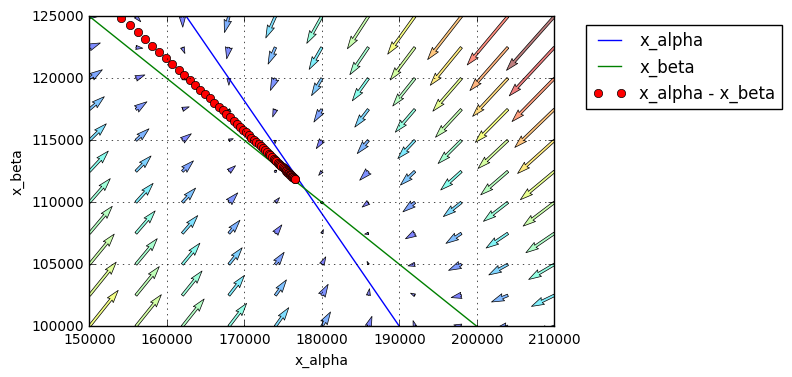

In [15]:
# 交点付近を拡大したベクトル場を描く

n_el = 10  # メッシュの数（各軸に描く矢印の数）

# 拡大する範囲
x_a_range = (150000, 210000)
x_b_range = (100000, 125000)

# 縦軸、横軸のメッシュをつくり、矢印を描くポイントのリストを作成する
x_a_el, x_b_el = np.mgrid[x_a_range[0]:x_a_range[1]+1:(x_a_range[1]-x_a_range[0])/n_el, 
                          x_b_range[0]:x_b_range[1]+1:(x_b_range[1]-x_b_range[0])/n_el ]

# ベクトル場の計算
dxdt_a_el, dxdt_b_el =  get_model_C_dxdt( [ x_a_el, x_b_el ], r_ls, K_ls, s_ls )
v_len_el = np.sqrt( dxdt_a_el ** 2 + dxdt_b_el ** 2)

# ベクトル場をプロットする
plt.quiver(x_a_el, x_b_el, dxdt_a_el, dxdt_b_el, v_len_el, alpha=.5 )
plt.quiver(x_a_el, x_b_el, dxdt_a_el, dxdt_b_el, edgecolor='k', facecolor='None', linewidth=.5 )

# ヌルクラインをプロットする
plt.plot( x_a_values, x_a_nullcline_values, "-", label='x_alpha' )
plt.plot( x_a_values, x_b_nullcline_values, "-", label='x_beta' )

# 個体数の推移をプロットする
plt.plot( model_C_result[:, 0], model_C_result[:, 1], "o", label='x_alpha - x_beta' )

plt.xlim([x_a_range[0], x_a_range[1]])
plt.ylim([x_b_range[0], x_b_range[1]])
plt.grid()
plt.xlabel('x_alpha')
plt.ylabel('x_beta')
plt.legend(loc='upper left', bbox_to_anchor=( 1.05, 1.0 ))
plt.show()



- 拡大したことで、状態点 $(x_{\alpha}, x_{\beta})$ が、$x_{\beta}$ のヌルクライン上にはないことがわかる。

### 別の初期値の状態推移を加えてみる。

- 別の初期値から時間発展したデータを加えてみる。 

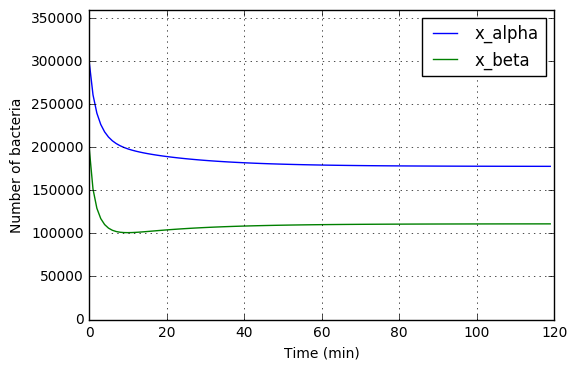

In [16]:
# 別の初期値
x0_a_2 = 300000
x0_b_2 = 200000
x0_2_ls = [ x0_a_2, x0_b_2 ]

model_C_2_result = odeint( model_C, x0_2_ls, t_values, args = ( r_ls, K_ls, s_ls ))

# グラフ描画（より見やすいグラフにするために書き換えてもよい）
plt.plot( t_values, model_C_2_result[:, 0], "-", label='x_alpha' )  # 微生物αの個体数をプロット
plt.plot( t_values, model_C_2_result[:, 1], "-", label='x_beta' )  # 微生物βの個体数をプロット
plt.ylim([0, max( K_ls ) * 1.2])  # Y軸の範囲を 0 ≦ y ≦ 1.2 K に制限
plt.grid()
plt.xlabel('Time (min)')
plt.ylabel('Number of bacteria')
plt.legend(loc='best')
plt.show()

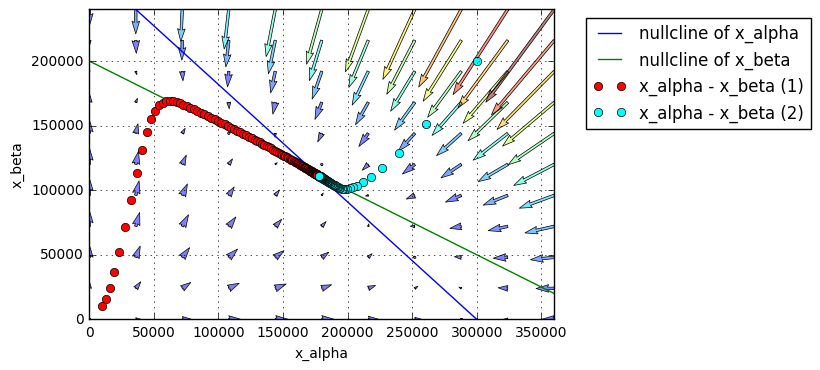

In [17]:
# ヌルクライン用の横軸（x_a）のポイントのリスト
x_a_values = np.arange( 0, K_a * 1.21, K_a * 1.2/n )

# x_αのヌルクライン
x_a_nullcline_values = ( K_a - x_a_values ) / s_b

# x_βのヌルクライン
x_b_nullcline_values = K_b - s_a * x_a_values

# ベクトル場をプロットする
plt.quiver(x_a, x_b, dxdt_a, dxdt_b, v_len, alpha=.5 )
plt.quiver(x_a, x_b, dxdt_a, dxdt_b, edgecolor='k', facecolor='None', linewidth=.5 )

# ヌルクラインをプロットする
plt.plot( x_a_values, x_a_nullcline_values, "-", label='nullcline of x_alpha' )
plt.plot( x_a_values, x_b_nullcline_values, "-", label='nullcline of x_beta' )

# 個体数の推移をプロットする
plt.plot( model_C_result[:, 0], model_C_result[:, 1], "o", label='x_alpha - x_beta (1)' )
plt.plot( model_C_2_result[:, 0], model_C_2_result[:, 1], "o", color='cyan', label='x_alpha - x_beta (2)' )

plt.xlim([0, K_a * 1.2])
plt.ylim([0, K_b * 1.2])
plt.grid()
plt.xlabel('x_alpha')
plt.ylabel('x_beta')
plt.legend(loc='upper left', bbox_to_anchor=( 1.05, 1.0 ))
plt.show()

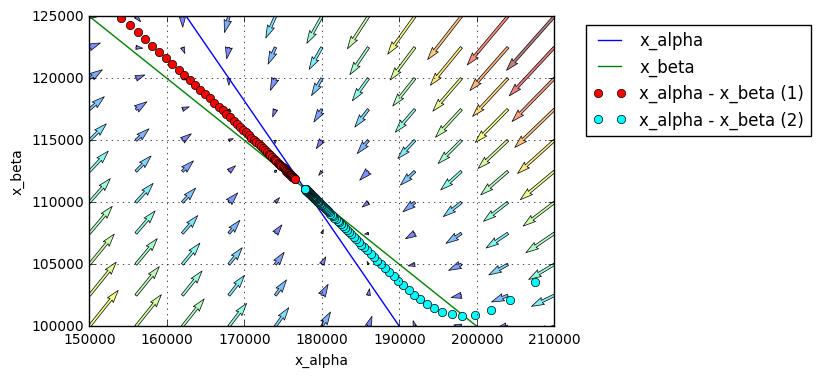

In [18]:
# 交点付近を拡大したベクトル場を描く

# ベクトル場をプロットする
plt.quiver(x_a_el, x_b_el, dxdt_a_el, dxdt_b_el, v_len_el, alpha=.5 )
plt.quiver(x_a_el, x_b_el, dxdt_a_el, dxdt_b_el, edgecolor='k', facecolor='None', linewidth=.5 )

# ヌルクラインをプロットする
plt.plot( x_a_values, x_a_nullcline_values, "-", label='x_alpha' )
plt.plot( x_a_values, x_b_nullcline_values, "-", label='x_beta' )

# 個体数の推移をプロットする
plt.plot( model_C_result[:, 0], model_C_result[:, 1], "o", label='x_alpha - x_beta (1)' )
plt.plot( model_C_2_result[:, 0], model_C_2_result[:, 1], "o", color='cyan', label='x_alpha - x_beta (2)' )

plt.xlim([x_a_range[0], x_a_range[1]])
plt.ylim([x_b_range[0], x_b_range[1]])
plt.grid()
plt.xlabel('x_alpha')
plt.ylabel('x_beta')
plt.legend(loc='upper left', bbox_to_anchor=( 1.05, 1.0 ))
plt.show()



### 【演習６】他にもいろいろ試して書き加えたり書き換えたりして、自然選択モデルCの性質を探ってみよう

- モデルのパラメータ $r$, $K$, $\sigma$ も変えてみましょう。

## おまけ

- 式10の連立方程式を解いて平衡点を求めるプログラム。
- `sympy`モジュールを用いる例。
  - 特別教室のiMacには`sympy`がインストールされていないので使えない。

In [19]:
# 特別教室にはsympyがインストールされていないので使えない。

import sympy

# 式10のx_α, x_βともに正の解だけを求める関数
def solve_eqn10( r, K, s ):
    x_a, x_b, = sympy.symbols('x_a x_b', positive = True)  # 正の値だけを考慮する
    return sympy.solve([r[0] * x_a * ( 1.0 - (( x_a + s[1] * x_b ) / K[0] )), 
                        r[1] * x_b * ( 1.0 - (( x_b + s[0] * x_a ) / K[1] ))], 
                       [x_a, x_b])

solve_eqn10( r_ls, K_ls, s_ls )

[(177777.777777778, 111111.111111111)]

## 【参考】matplotlibで指定できる色

![](http://pythondatascience.plavox.info/wp-content/uploads/2016/06/colorpalette.png)